In [ ]:
#importing the required libraries

import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
##creating an one hot encoder for targetting the classes

encoder = OneHotEncoder()
encoder.fit([[0], [1]])

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

In [ ]:
# This cell updates result list for images containing the tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/drive/MyDrive/Brain_Tumor_Dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())


In [ ]:
# This cell updates result list for images that doesn't contain the tumor

paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/Brain_Tumor_Dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [ ]:
#data list for storing image data in numpy array form

data = np.array(data)
data.shape

(139, 128, 128, 3)

In [ ]:
#result list for storing one hot encoded form of target class whether normal or tumor

result = np.array(result)
result = result.reshape(139,2)

In [ ]:
#splitting the data set into training and testing sets

x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [ ]:
#building a CNN Model

model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      416       
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_2 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 64)        8256      
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 64)       

In [ ]:
y_train.shape

(111, 2)

In [ ]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))


Epoch 1/10
3/3 [==============================] - 3s 179ms/step - loss: 18.5492 - val_loss: 77.1308
Epoch 2/10
3/3 [==============================] - 0s 78ms/step - loss: 6.2772 - val_loss: 20.5630
Epoch 3/10
3/3 [==============================] - 0s 72ms/step - loss: 2.6145 - val_loss: 11.2519
Epoch 4/10
3/3 [==============================] - 0s 70ms/step - loss: 1.0782 - val_loss: 4.5634
Epoch 5/10
3/3 [==============================] - 0s 70ms/step - loss: 0.5312 - val_loss: 5.4566
Epoch 6/10
3/3 [==============================] - 0s 70ms/step - loss: 0.4900 - val_loss: 2.8036
Epoch 7/10
3/3 [==============================] - 0s 74ms/step - loss: 0.0859 - val_loss: 1.4020
Epoch 8/10
3/3 [==============================] - 0s 70ms/step - loss: 0.0757 - val_loss: 1.2278
Epoch 9/10
3/3 [==============================] - 0s 74ms/step - loss: 0.0254 - val_loss: 1.2682
Epoch 10/10
3/3 [==============================] - 0s 72ms/step - loss: 0.0170 - val_loss: 1.3536


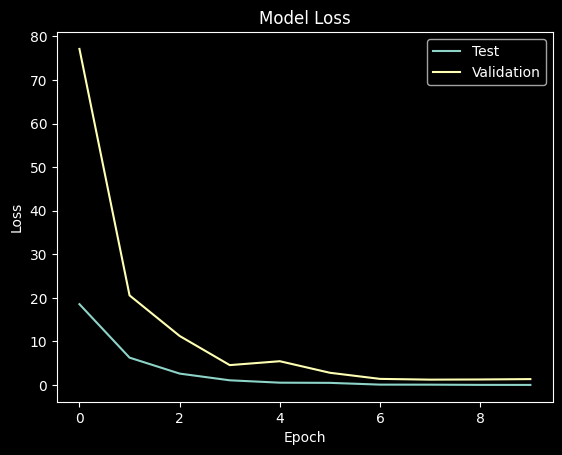

In [ ]:
#plotting the losses

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [ ]:
def names(number):
    if number==0:
        return 'TUMOR DETECTED'
    else:
        return 'NO TUMOR DETECTED'

NO TUMOR DETECTED


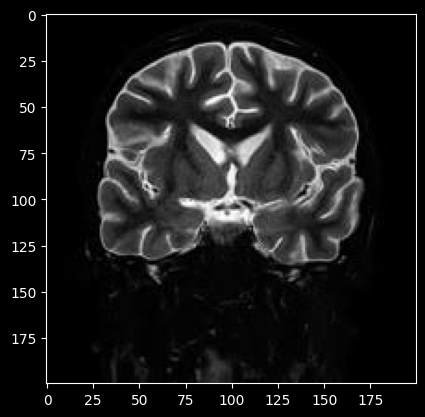

In [ ]:
#Testing the model

from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/Brain_Tumor_Dataset/no/19 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(names(classification))

TUMOR DETECTED


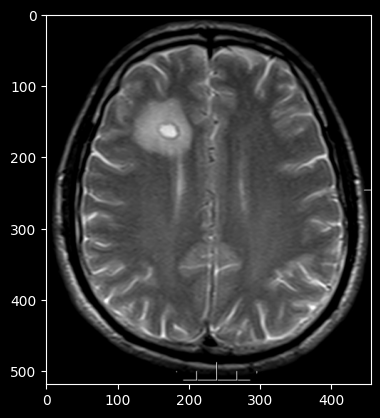

In [ ]:
#Testing the model

from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/Brain_Tumor_Dataset/yes/Y3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(names(classification))